In [1]:
#3.30 velocities [110, 106, 104, 100, 97]
#4.00 velocities [115, 111, 110, 108, 104] [113, 111, 108, 105, 102]


#For 6.00, flat topped is best fit!!!!! (breedte ~350Å)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import add_funcs_revamped_total as af
import scipy.integrate as integrate
from scipy.interpolate import make_interp_spline, BSpline
from scipy.optimize import curve_fit
from astropy.io import ascii

In [4]:
import matplotlib
plt.style.use('seaborn-dark-palette')
font = {'size'   : 16}
matplotlib.rc('font', **font)

/tmp/ipykernel_422/270944681.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [15]:
project_names = ["SUMO_Projects_v1p0/400d", 
                "SUMO_Projects_v1p0/400d"]
spectrum_names = ["/spectrum_he8p00_AJ_0_100.datrun001", "/spectrum_he4p00_AJ_10_90.datrun001"]
colours = ['blue', 'red', 'green'] #for the plotting
non_comparative_plot_name = '8p00_400d_Nitrogenshape.png'
comparative_plot_name = 'v1p0_vs_v1p2.pdf'
git_folder_loc = '/home/masterofalorgia/'
zoom = [4000, 9000] #Give the region to be zoomed in at.

wavelengths, fluxes, NII_fluxes, OI_fluxes, CI_fluxes, CaII_fluxes = [], [], [], [], [], []

for i in range(len(project_names)):
    spectrum_path = git_folder_loc + "NII_nebular_phase/SUMO_results/" + project_names[i]
    data = ascii.read(spectrum_path + spectrum_names[i])
    
    wavelength_raw = data['col1'] #In Ångström
    flux_raw = data['col2'] #In erg s-1 cm-2 Å-1
    NII_flux_raw = data['col15'] #See ABIN Codes on github
    OI_flux_raw = data['col19']
    CI_flux_raw = data['col9']
    CaII_flux_raw = data['col55']
    
    filter1 = (wavelength_raw < zoom[1])*(wavelength_raw > zoom[0])
    filter2 = ...

    wavelength = wavelength_raw[filter1]
    flux = flux_raw[filter1]
    NII_flux = NII_flux_raw[filter1]
    OI_flux = OI_flux_raw[filter1]
    CI_flux = CI_flux_raw[filter1]
    CaII_flux = CaII_flux_raw[filter1]
    
    wavelengths.append(wavelength)
    fluxes.append(flux)
    NII_fluxes.append(NII_flux)
    OI_fluxes.append(OI_flux)
    CI_fluxes.append(CI_flux)
    CaII_fluxes.append(CaII_flux)

A plot with the same name already exists. Do you want to overwrite it? (y/n)n
Okay! The plot is not saved. Be sure to change the variable 'plot_name' at the top of the script.


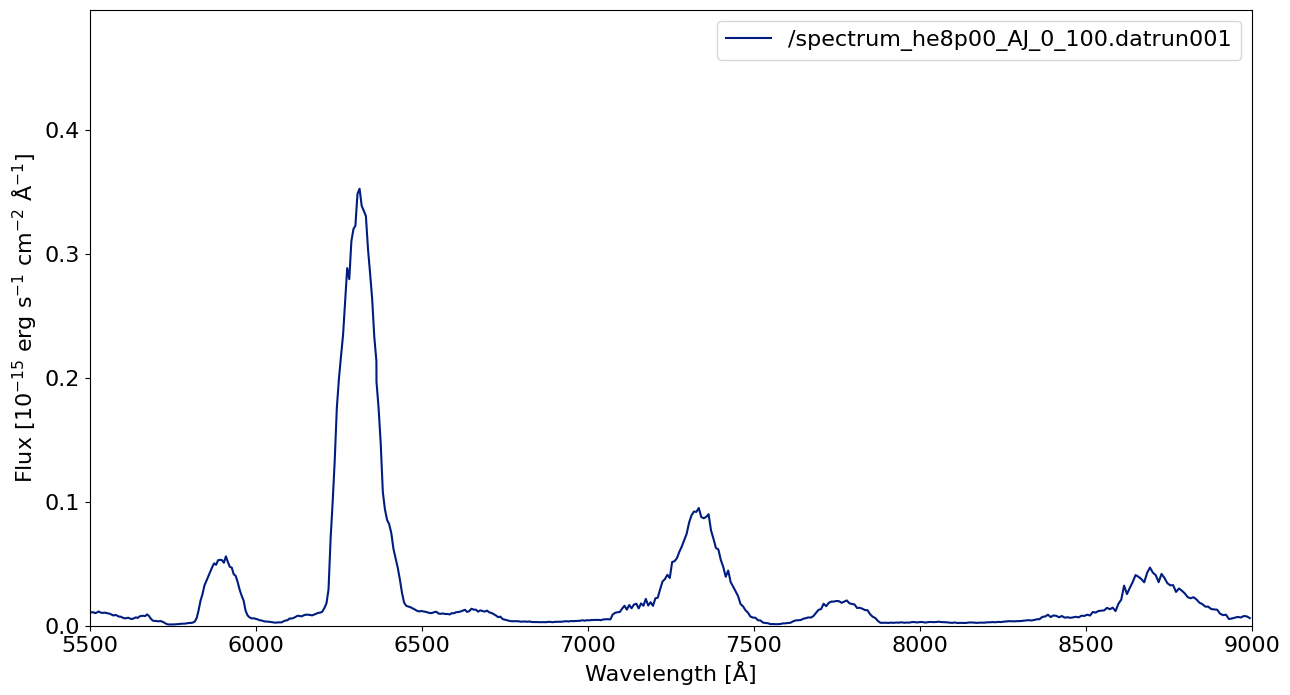

0.0048499
[6.57574384e+03 5.09318500e-03 1.14200147e+02] [6.57500000e+03 4.27171905e-03 1.40000000e+02]
3.3202034585565148


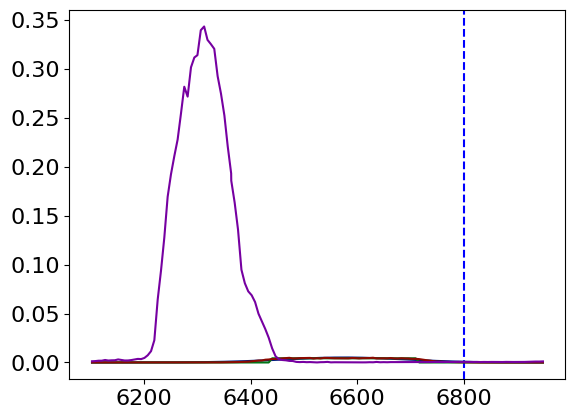

In [16]:
#This plot only plots the spectra

step_size = 1

fig, ax = plt.subplots(1, figsize = (15, 8))

#Create the main plot containing the absolute spectra
#====================================================================================================
trans = ax.get_xaxis_transform() #For easier plotting of labels of vertical lines later

for i in range(1):
    #ax.plot(wavelengths[i][::step_size], OI_fluxes[i][::step_size]*10**15, label = project_names[i])
    #ax.plot(wavelengths[i][::step_size], CI_fluxes[i], label = project_names[i])
    #ax.plot(wavelengths[i][::step_size], CaII_fluxes[i], label = project_names[i])
    #ax.plot(wavelengths[i][::step_size], NII_fluxes[i][::step_size]/fluxes[i][::step_size], label = project_names[i])
    ax.plot(wavelengths[i][::step_size], fluxes[i][::step_size]*10**15, label = spectrum_names[i])


ax.set_xlabel('Wavelength [Å]')
ax.set_ylabel('Flux [10$^{-15}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$]')

#Plot some important emission lines
line_names = np.array(["[O I] λλ 6300, 6364", "Mg I] λ 4571",
                       "[Ca II] λλ 7291, 7323", "Hα", "[N II] λλ 6548, 6583",
                       "[N II] λ 5747", "[C I] λ 8727"])
line_wl = np.array([6300, 4571, 7291, 6562, 6575, 5747, 8727])
active = np.array([True, True, True, False, True, True, True])

for i in range(len(line_wl)):
    if line_wl[i] > zoom[1] or line_wl[i] < zoom[0]:
        active[i] = False

#for i in range(len(line_names)):
#    if active[i] == True:
#        ax.axvline(x = line_wl[i], linestyle = '--', c = 'gray', lw = 1, alpha = 0.5)
#        fig.text(x = line_wl[i]-180, y = 0.6, s = line_names[i], transform = trans, rotation = 90)

ax.set_xlim(5500, 9000)
ax.set_ylim(bottom = 0)

ax.legend()
#ax.plot(wllie, af.gaussian(wllie, 6570, 0.01, 97))
#ax.plot(wllie, af.tophat(wllie, 6570, 0.01, 120))

#Save the plot
#====================================================================================================
isFile = os.path.isfile(non_comparative_plot_name)

if isFile == True:
    answer = input("A plot with the same name already exists. Do you want to overwrite it? (y/n)")
    while answer != 'y' and answer != 'n':
        answer = input("That is not a valid answer. The only valid answers are y and n")
    
    if answer == 'y':
        plt.savefig(non_comparative_plot_name)
    elif answer == 'n':
        print("Okay! The plot is not saved. Be sure to change the variable 'plot_name' at the top of the script.")
        
elif isFile == False:
    plt.savefig(non_comparative_plot_name)
#====================================================================================================
wllie = np.arange(6100, 7000)

plt.show()

fig, ax = plt.subplots(1)
labbie = 6800
maskie = (wavelengths[0] > 6100) * (wavelengths[0] < 6950)
wl_new, NII_fluxie = wavelengths[0][maskie], NII_fluxes[0][maskie]*10**15
print(np.max(NII_fluxie))
popt, pcov = curve_fit(af.gaussian, wl_new, NII_fluxie, p0 = [6575, 0.01, 140])
popt2, pcov2 = curve_fit(af.tophat, wl_new, NII_fluxie, p0 = [6575, 0.01, 140])
print(popt, popt2)
ax.axvline(x = labbie, linestyle = '--', c = 'b')
ax.plot(wl_new, af.gaussian(wl_new, *popt))
ax.plot(wl_new, af.tophat(wl_new, *popt2))
ax.plot(wl_new, NII_fluxie)
ax.plot(wl_new, OI_fluxes[0][maskie]*10**15)
#ax.plot(wl_new, fluxes[0][maskie]*10**15)


integrated_NII_flux = integrate.cumtrapz(NII_fluxie, wl_new)[-1]
normalisation_mask = (wavelengths[0] > 5000) * (wavelengths[0] < 8000)
normalisation_mask_OI = (wavelengths[0] > 6000) * (wavelengths[0] < 6600)
min_corrected_flux = fluxes[0][normalisation_mask] - np.min(fluxes[0][normalisation_mask])
integrated_total_flux = integrate.cumtrapz(min_corrected_flux*10**15, wavelengths[0][normalisation_mask])[-1]
integrated_OI_flux = integrate.cumtrapz(OI_fluxes[0][normalisation_mask_OI]*10**15, wavelengths[0][normalisation_mask_OI])[-1]
print(integrated_NII_flux*100/integrated_OI_flux)
plt.show()

IndexError: list index out of range

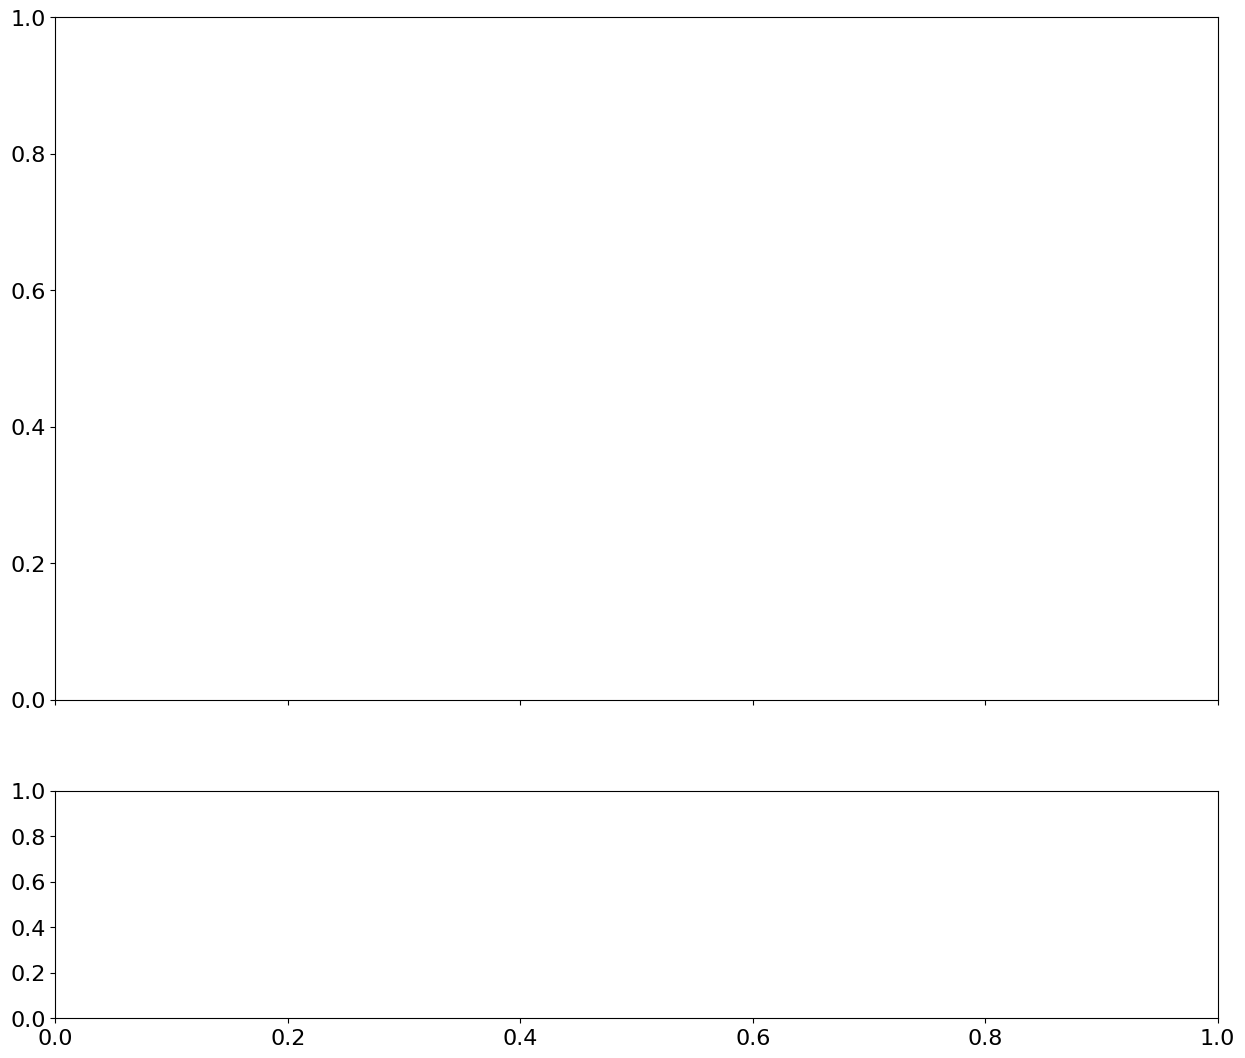

In [32]:
#This plot plots the spectra and then compares them

fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (15, 13), sharex = True)

#Create the main plot containing the absolute spectra
#====================================================================================================
trans = ax[0].get_xaxis_transform() #For easier plotting of labels of vertical lines later

for i in range(len(project_names)):
    ax[0].plot(wavelengths[i][::step_size], fluxes[i][::step_size], label = project_names[i], c= colours[i]) #/np.max(fluxes[i][::step_size])
    #ax[0].plot(wavelengths[i][::step_size], NII_fluxes[i][::step_size]/np.max(fluxes[i][::step_size]), label = project_names[i]+'_NII', c= colours[i], linestyle = '--', lw = 0.7)
    #ax[0].plot(wavelengths[i][::step_size], OI_fluxes[i][::step_size]*10**15, label = project_names[i]+'_OI', c= colours[i], linestyle = ':', lw = 0.7)

ax[0].set_ylabel('Flux [10$^{-15}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$]')

#Plot some important emission lines
line_names = np.array(["[O I] λλ 6300, 6364", "Mg I] λ 4571",
                       "[Ca II] λλ 7291, 7323", "Hα", "[N II] λλ 6548, 6583",
                       "[N II] λ 5747", "[C I] λ 8727"])
line_wl = np.array([6300, 4571, 7291, 6562, 6548, 5747, 8727])
active = np.array([True, True, True, False, True, True, True])

for i in range(len(line_wl)):
    if line_wl[i] > zoom[1] or line_wl[i] < zoom[0]:
        active[i] = False

for i in range(len(line_names)):
    if active[i] == True:
        ax[0].axvline(x = line_wl[i], linestyle = '--', c = 'gray', lw = 1, alpha = 0.5)
        fig.text(x = line_wl[i]-120, y = 0.7, s = line_names[i], transform = trans, rotation = 90)

ax[0].set_xlim(zoom[0], zoom[1])
ax[0].set_ylim(bottom = 0)

width = 2*110
ax[0].axvline(x = 6575+width)
ax[0].axvline(x = 6575-width)
#sys.exit()

ax[0].legend()

#Create the secondary plot comparing the spectra 
#====================================================================================================
for i in range(len(project_names)-1):
    ax[1].plot(wavelengths[i+1][:1606:step_size], (fluxes[i+1][:1606:step_size]-fluxes[0][:1606:step_size])*10**15, label = project_names[i+1] + ' - ' + project_names[0])

for i in range(len(line_names)):
    if active[i] == True:
        ax[1].axvline(x = line_wl[i], linestyle = '--', c = 'gray', lw = 1, alpha = 0.5)
    
ax[1].set_xlim(zoom[0], zoom[1])

ax[1].set_xlabel('Wavelength [Å]')
ax[1].set_ylabel('Flux difference [10$^{-15}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$]')

ax[1].legend()

#Save the plot
#====================================================================================================
isFile = os.path.isfile(comparative_plot_name)

if isFile == True:
    answer = input("A plot with the same name already exists. Do you want to overwrite it? (y/n)")
    while answer != 'y' and answer != 'n':
        answer = input("That is not a valid answer. The only valid answers are y and n")
    
    if answer == 'y':
        plt.savefig(comparative_plot_name)
    elif answer == 'n':
        print("Okay! The plot is not saved. Be sure to change the variable 'plot_name' at the top of the script.")
        
elif isFile == False:
    plt.savefig(comparative_plot_name)

#====================================================================================================


plt.show()

## Get the NII Luminosity Fraction

In [ ]:
c = 299792.458 #km/s
def v_from_labda(labda, labda0):
    
    ratio = labda/labda0
    return (ratio**2-1)*c/(ratio**2+1)

def doppler_factor(v):
    
    return np.sqrt( (1+v/c)/(1-v/c) )

print(v_from_labda(labda = 6548, labda0 = 6394))
print(doppler_factor(7100)*6583)

In [ ]:
#Machinery to give the relative NII doublet strength


pre_determined_v_bool = True #We can either give a v (i.e. a line width) within which all N flux should ocurr,
                             #Or we can simply pick all wl within rough boundaries at which the NII flux is 
                             #above a threshold of the max flux, here set to 0.001

pre_determined_v = 8000 #km/s
rough_wl_left = 6000 #Å
rough_wl_right = 7200 #Å

#Depending on the above condition, set the boundaries within which to integrate NII flux
if pre_determined_v_bool == False:
    wl_left, wl_right = rough_wl_left, rough_wl_right
elif pre_determined_v_bool == True:
    wl_left, wl_right = doppler_factor(-pre_determined_v)*6548, doppler_factor(pre_determined_v)*6583
    
    
#Integrate NII for each model
for i in range(len(NII_fluxes)):
    wl = wavelengths[i]
    flux = fluxes[i]
    NII_flux = NII_fluxes[i]
    NII_flux_diff = np.array([NII_flux[i+1]-NII_flux[i] for i in range(len(NII_flux)-1)]) #Derivative

    condition1 = (NII_flux > 0.001*np.max(NII_flux)) #The 'threshold' condition
    condition2 = ( (wl > wl_left) * (wl < wl_right) )
    
    if pre_determined_v_bool == False: 
        NII_mask = np.where(condition1*condition2)[0]
    elif pre_determined_v_bool == True:
        NII_mask = np.where(condition2)[0]

    integrated_NII = integrate.cumtrapz(NII_flux[NII_mask], wl[NII_mask])[-1]
    total_flux = integrate.cumtrapz(flux, wl)[-1]

    print("For", project_names[i],  "the NII doublet carries ", '{0:.1f}'.format(integrated_NII*100/total_flux), "% of all flux.")

#=================================================================================================================

pre_determined_v_bool = False
pre_determined_v = 8000 #km/s
rough_wl_left = 6000 #Å
rough_wl_right = 7200 #Å

#Depending on the above condition, set the boundaries within which to integrate OI flux
if pre_determined_v_bool == False:
    wl_left, wl_right = rough_wl_left, rough_wl_right
elif pre_determined_v_bool == True:
    wl_left, wl_right = doppler_factor(-pre_determined_v)*6300, doppler_factor(pre_determined_v)*6363
    
    
    
    
#Integrate OI for each model
for i in range(len(OI_fluxes)):
    wl = wavelengths[i]
    flux = fluxes[i]
    OI_flux = OI_fluxes[i]
    OI_flux_diff = np.array([OI_flux[i+1]-OI_flux[i] for i in range(len(OI_flux)-1)]) #Derivative

    condition1 = (OI_flux > 0.001*np.max(OI_flux)) #The 'threshold' condition
    condition2 = ( (wl > wl_left) * (wl < wl_right) )
    
    if pre_determined_v_bool == False: 
        OI_mask = np.where(condition1*condition2)[0]
    elif pre_determined_v_bool == True:
        OI_mask = np.where(condition2)[0]

    integrated_OI = integrate.cumtrapz(OI_flux[OI_mask], wl[OI_mask])[-1]
    total_flux = integrate.cumtrapz(flux, wl)[-1]

    print("For", project_names[i],  "the OI doublet carries ", '{0:.1f}'.format(integrated_OI*100/total_flux), "% of all flux.")
    